 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [48]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [49]:

algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date" , infer_datetime_format= True , parse_dates=True)


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [50]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date" , infer_datetime_format= True , parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [51]:
# Count nulls
whale_df.isna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [52]:
# Drop nulls
whale_df = whale_df.dropna()

In [53]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [54]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date" , infer_datetime_format= True , parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [55]:
# Count null
algo_df.isna()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [56]:
# Drop nulls
algo_df = algo_df.dropna()

In [57]:
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [58]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date" , infer_datetime_format= True , parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [59]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [60]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

/Users/enriquebriceno/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [61]:
# Calculate Daily Returns
sp500_return = sp500_df.pct_change()
sp500_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [62]:
# Drop nulls
sp500_return = sp500_return.dropna()
sp500_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [63]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return = sp500_return.rename(columns = {"Close":"SP500"})
sp500_return.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [64]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_df, algo_df,sp500_return], axis = "columns",join="inner")
returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Return'}, xlabel='Date'>

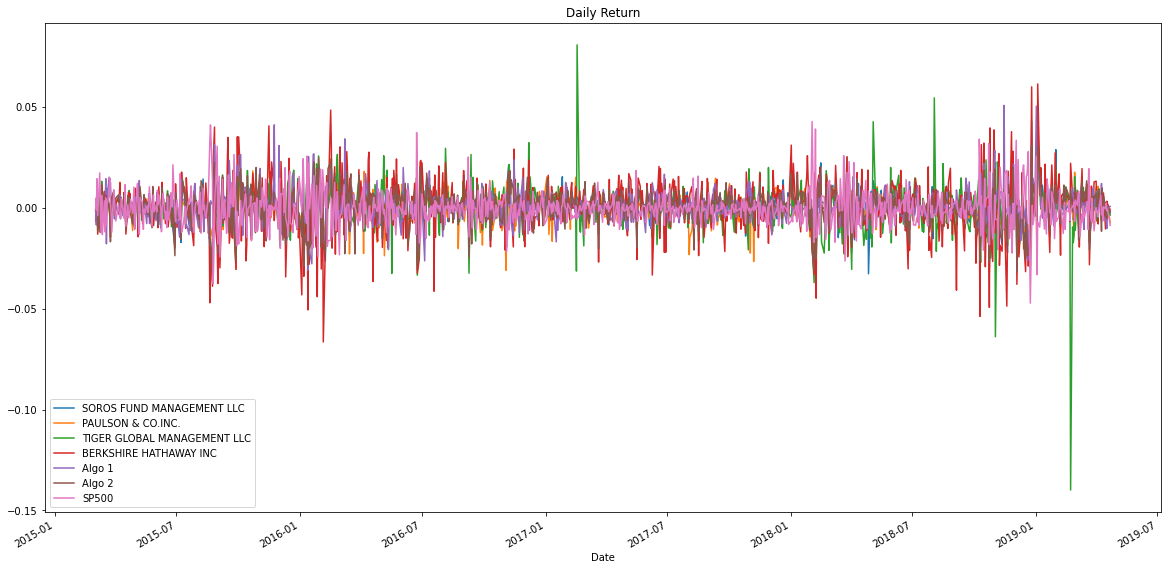

In [65]:
# Plot daily returns of all portfolios
returns_df.plot(figsize=(20,10),title="Daily Return")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='Date'>

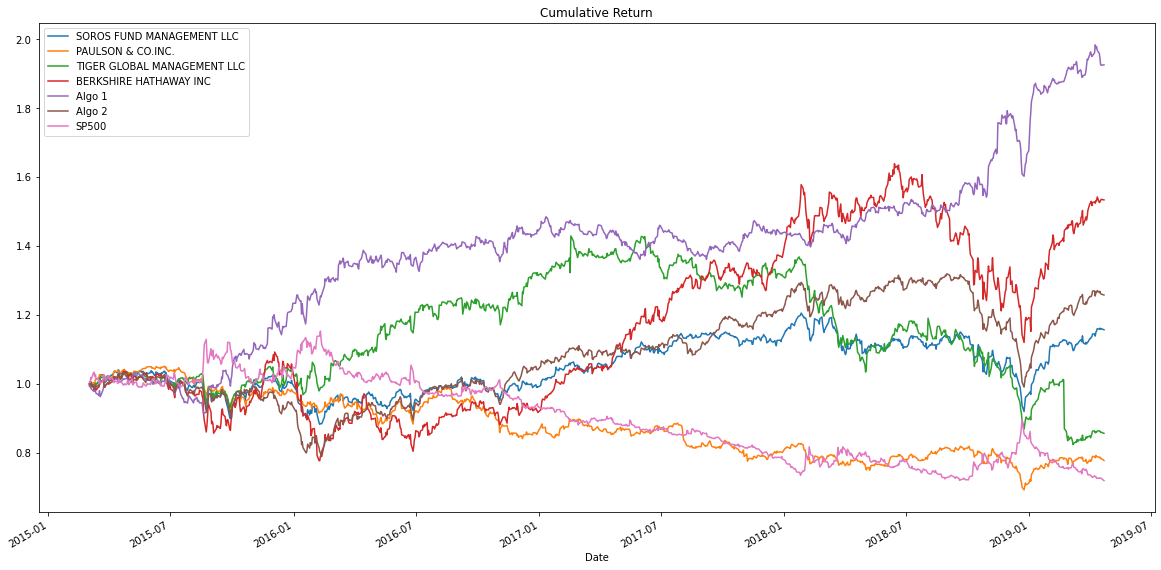

In [66]:
# Calculate cumulative returns of all portfolios
cumulative_returns=(1+returns_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title="Cumulative Return")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


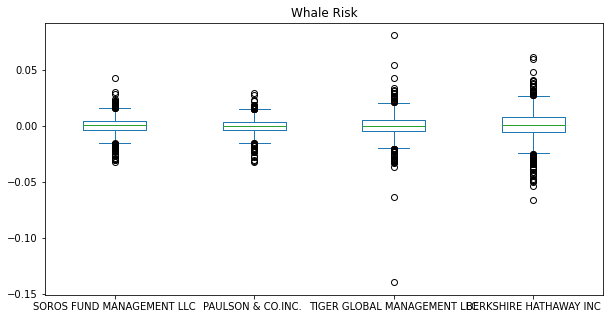

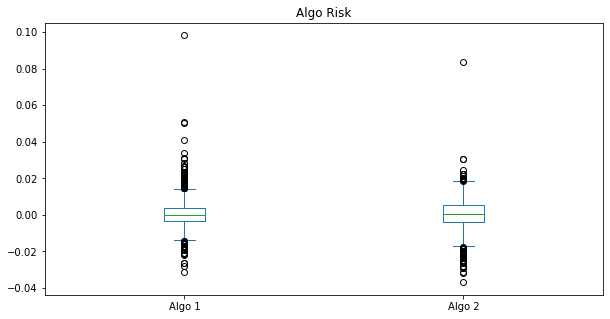

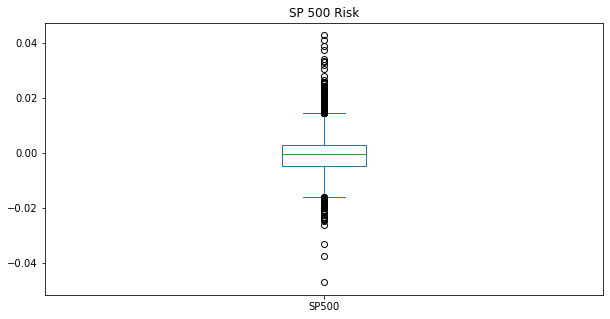

In [67]:
# Box plot to visually show risk
whale_box_plot = whale_df.plot.box(figsize=(10,5), title="Whale Risk")
algo_box_plot = algo_df.plot.box(figsize=(10,5), title="Algo Risk")
sp500_box_plot = sp500_return.plot.box(figsize=(10,5), title= "SP 500 Risk")

### Calculate Standard Deviations

In [68]:
# Calculate the daily standard deviations of all portfolios
all_std = returns_df.std()
all_std.head()


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [69]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_return.std()
sp500_std.head()

SP500    0.008135
dtype: float64

In [70]:
# Determine which portfolios are riskier than the S&P 500
algo_std = algo_df.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [71]:
whale_std = whale_df.std()
whale_std.head()
#berkshire and tiget global are more riskier than SP500

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Calculate the Annualized Standard Deviation

In [72]:
# Calculate the annualized standard deviation (252 trading days)
std_annual = all_std * np.sqrt(252)
std_annual.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

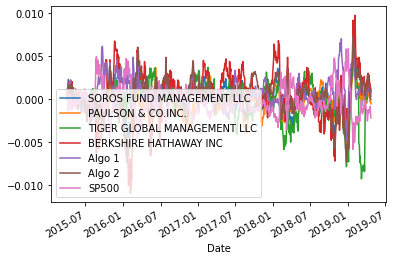

In [105]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns_df.rolling(window=21).mean().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

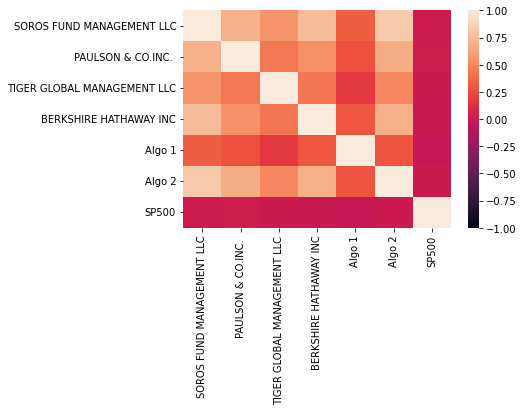

In [107]:
# Calculate the correlation
correlations=returns_df.corr()
# Display de correlation matrix
sns.heatmap(correlations, vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

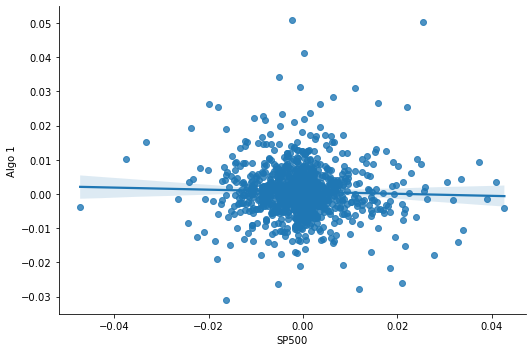

In [75]:
# Calculate covariance of a single portfolio
coveriance = returns_df['Algo 1'].cov(returns_df['SP500'])
coveriance
# Calculate variance of S&P 500
variance = returns_df['SP500'].var()
# Computing beta
algo_beta= coveriance / variance
# Plot beta trend
sns.lmplot(x='SP500', y="Algo 1", data=returns_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [76]:
# Use `ewm` to calculate the rolling window
ewm = returns_df.ewm(halflife=21).mean()
ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [77]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

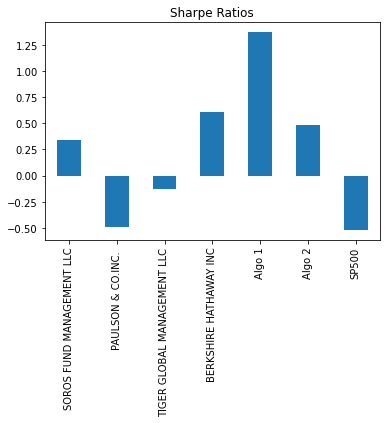

In [78]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [79]:
#per sharpe ratio the algorithmic strag outperformed the other portfolios

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [80]:
# Reading data from 1st stock
TSLA_data = Path("Resources/TSLA_CLOSING.csv")
TSLA_df = pd.read_csv(TSLA_data,index_col="Date",infer_datetime_format=True,parse_dates=True)
TSLA_df

,Close
Date,
2015-03-03 16:00:00,39.91
2015-03-04 16:00:00,40.49
2015-03-05 16:00:00,40.13
2015-03-06 16:00:00,38.78
2015-03-09 16:00:00,38.18
...,...
2019-04-09 16:00:00,54.46
2019-04-10 16:00:00,55.21
2019-04-11 16:00:00,53.68


In [81]:
# Reading data from 2nd stock
MSFT_data = Path("Resources/MSFT_CLOSE .csv")
MSFT_df = pd.read_csv(MSFT_data, index_col="Date" ,infer_datetime_format= True, parse_dates=True)
MSFT_df

,Close
Date,
2015-03-03 16:00:00,43.28
2015-03-04 16:00:00,43.06
2015-03-05 16:00:00,43.11
2015-03-06 16:00:00,42.36
2015-03-09 16:00:00,42.85
...,...
2019-04-09 16:00:00,119.28
2019-04-10 16:00:00,120.19
2019-04-11 16:00:00,120.33


In [82]:
# Reading data from 3rd stock
SONY_data = Path("Resources/SONY_CLOSE.csv")
SONY_df = pd.read_csv(SONY_data, index_col="Date" , infer_datetime_format=True, parse_dates=True)
SONY_df

,Close
Date,
2015-03-03 16:00:00,27.83
2015-03-04 16:00:00,27.89
2015-03-05 16:00:00,28.06
2015-03-06 16:00:00,27.51
2015-03-09 16:00:00,27.27
...,...
2019-04-09 16:00:00,46.19
2019-04-10 16:00:00,46.08
2019-04-11 16:00:00,46.25


In [83]:
# Combine all stocks in a single DataFrame
combine_df= pd.concat([TSLA_df,MSFT_df,SONY_df],axis="columns",join="inner")
combine_df

,Close,Close,Close
Date,,,
2015-03-03 16:00:00,39.91,43.28,27.83
2015-03-04 16:00:00,40.49,43.06,27.89
2015-03-05 16:00:00,40.13,43.11,28.06
2015-03-06 16:00:00,38.78,42.36,27.51
2015-03-09 16:00:00,38.18,42.85,27.27
...,...,...,...
2019-04-09 16:00:00,54.46,119.28,46.19
2019-04-10 16:00:00,55.21,120.19,46.08
2019-04-11 16:00:00,53.68,120.33,46.25


In [84]:
# Reset Date index
combine_df.sort_index()

,Close,Close,Close
Date,,,
2015-03-03 16:00:00,39.91,43.28,27.83
2015-03-04 16:00:00,40.49,43.06,27.89
2015-03-05 16:00:00,40.13,43.11,28.06
2015-03-06 16:00:00,38.78,42.36,27.51
2015-03-09 16:00:00,38.18,42.85,27.27
...,...,...,...
2019-04-09 16:00:00,54.46,119.28,46.19
2019-04-10 16:00:00,55.21,120.19,46.08
2019-04-11 16:00:00,53.68,120.33,46.25


In [85]:
# Reorganize portfolio data by having a column per symbol
columns = ["TSLA","MSFT","SONY"]
combine_df.columns= columns
combine_df.head()

,TSLA,MSFT,SONY
Date,,,
2015-03-03 16:00:00,39.91,43.28,27.83
2015-03-04 16:00:00,40.49,43.06,27.89
2015-03-05 16:00:00,40.13,43.11,28.06
2015-03-06 16:00:00,38.78,42.36,27.51
2015-03-09 16:00:00,38.18,42.85,27.27


In [86]:
# Calculate daily returns
combine_returns= combine_df.pct_change()
combine_returns.head()
# Drop NAs
combine_returns=combine_returns.dropna()

In [87]:
# Display sample data
combine_returns.head()

,TSLA,MSFT,SONY
Date,,,
2015-03-04 16:00:00,0.014533,-0.005083,0.002156
2015-03-05 16:00:00,-0.008891,0.001161,0.006095
2015-03-06 16:00:00,-0.033641,-0.017397,-0.019601
2015-03-09 16:00:00,-0.015472,0.011568,-0.008724
2015-03-10 16:00:00,-0.003143,-0.019137,-0.025669


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
combine_returns.index= combine_returns.index.date

In [89]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return=combine_returns.dot(weights)
# Display sample data
portfolio_return.head()

2015-03-04    0.003868
2015-03-05   -0.000545
2015-03-06   -0.023546
2015-03-09   -0.004209
2015-03-10   -0.015983
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [95]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([portfolio_return,returns_df],axis="columns",join="inner")
all_returns.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2015-03-04 00:00:00,0.003868,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05 00:00:00,-0.000545,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06 00:00:00,-0.023546,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09 00:00:00,-0.004209,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10 00:00:00,-0.015983,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921


In [99]:
all_returns.rename(columns = {'0':'myportfolio'}, inplace = True)

In [103]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns=all_returns.dropna()
all_returns.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2015-03-04 00:00:00,0.003868,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05 00:00:00,-0.000545,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06 00:00:00,-0.023546,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09 00:00:00,-0.004209,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10 00:00:00,-0.015983,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [102]:
# Calculate the annualized `std`
combine_std= combine_returns*np.sqrt(252)
combine_std.head()

,TSLA,MSFT,SONY
2015-03-04,0.230699,-0.080693,0.034225
2015-03-05,-0.141142,0.018433,0.096761
2015-03-06,-0.534029,-0.276174,-0.311154
2015-03-09,-0.245609,0.183629,-0.138491
2015-03-10,-0.049894,-0.303783,-0.407486


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

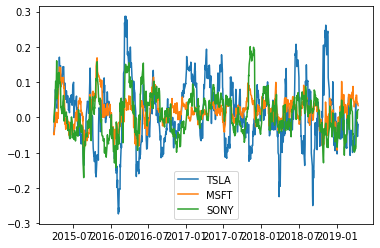

In [106]:
# Calculate rolling standard deviation
combine_rolling=combine_std.rolling(window=21).mean()
# Plot rolling standard deviation
combine_rolling.plot()

### Calculate and plot the correlation

In [108]:
# Calculate and plot the correlation
corr=combine_rolling.corr()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

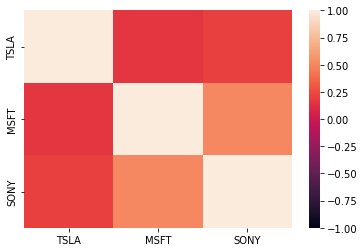

In [110]:
# Calculate and plot Beta
sns.heatmap(corr, vmin=-1,vmax=1)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [112]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (combine_returns.mean() * 252) / (combine_returns.std() * np.sqrt(252))
sharpe_ratio

TSLA    0.379400
MSFT    1.177519
SONY    0.573083
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

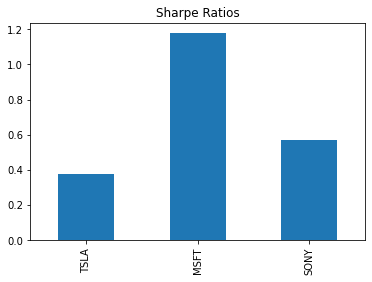

In [113]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!